In [1]:
%run -i 'first_try.ipynb'

277524
height: 30 width: 50 path: ./data/9036/0/9036_idx5_x1601_y2851_class0.png
height: 30 width: 50 path: ./data/9036/0/9036_idx5_x701_y2851_class0.png
['./data/9036/0/9036_idx5_x1051_y2401_class0.png', './data/9036/0/9036_idx5_x2951_y951_class0.png', './data/9036/0/9036_idx5_x3001_y1451_class0.png', './data/9036/0/9036_idx5_x3051_y801_class0.png', './data/9036/0/9036_idx5_x951_y1901_class0.png']
['./data/9036/1/9036_idx5_x1851_y1351_class1.png', './data/9036/1/9036_idx5_x1851_y1451_class1.png', './data/9036/1/9036_idx5_x1751_y1601_class1.png', './data/9036/1/9036_idx5_x1801_y1501_class1.png', './data/9036/1/9036_idx5_x1801_y1201_class1.png']
Number of images: 10000
Non-IDC: 8596
IDC: 1404
Pixel values in range from 0 to 255


/Users/mstazherova/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
import numpy as np

Using TensorFlow backend.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=42)

In [4]:
print(X_train.shape)

(9000, 50, 50, 3)


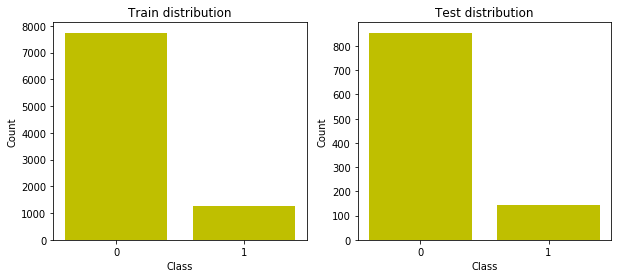

In [7]:
def plot_label_distr(y, title, ax):
    ax.hist(y, bins=range(0,3), facecolor='y', align = 'left', rwidth=0.8)
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.set_xticks(range(2))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
plot_label_distr(y_train, "Train distribution", ax1)
plot_label_distr(y_test, "Test distribution", ax2)

In [8]:
y_train_onehot = np_utils.to_categorical(y_train, 2)
y_test_onehot = np_utils.to_categorical(y_test, 2)
print(y_train_onehot.shape)

(9000, 2)


In [9]:
def simpleCNN():
    input_shape = (50, 50, 3)
    num_classes = 2
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape)) # strides=(1, 1) default
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn = simpleCNN()
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              5185000   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2002      
Total para

In [11]:
#from keras.callbacks import History 
#history = History()

epochs = 10
batch_size = 128

learn_cnn = cnn.fit(X_train, y_train_onehot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
          # callbacks=[history])

Epoch 1/10
9000/9000 [==============================] - 47s 5ms/step - loss: 0.3219 - acc: 0.8732
Epoch 2/10
9000/9000 [==============================] - 50s 6ms/step - loss: 0.2954 - acc: 0.8754
Epoch 3/10
9000/9000 [==============================] - 53s 6ms/step - loss: 0.3043 - acc: 0.8769
Epoch 4/10
9000/9000 [==============================] - 50s 6ms/step - loss: 0.2946 - acc: 0.8777
Epoch 5/10
9000/9000 [==============================] - 50s 6ms/step - loss: 0.3137 - acc: 0.8769
Epoch 6/10
9000/9000 [==============================] - 50s 6ms/step - loss: 0.2901 - acc: 0.8771
Epoch 7/10
9000/9000 [==============================] - 54s 6ms/step - loss: 0.2918 - acc: 0.8800
Epoch 8/10
9000/9000 [==============================] - 49s 5ms/step - loss: 0.2840 - acc: 0.8861
Epoch 9/10
9000/9000 [==============================] - 46s 5ms/step - loss: 0.2873 - acc: 0.8843
Epoch 10/10
9000/9000 [==============================] - 44s 5ms/step - loss: 0.2829 - acc: 0.8851


In [14]:
score = cnn.evaluate(X_test, y_test_onehot, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.876


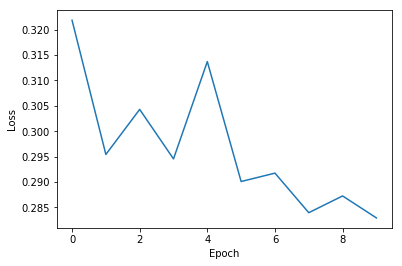

In [15]:
plt.plot(learn_cnn.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()